### (상황9, 감정5) stopwords.txt + 사람문장12에 사람문장3을 concat한 csv파일을 추정감정모델 돌려보기

In [53]:
import pandas as pd

data_df = pd.read_csv('C:/playdata/DL_miniproject/deeplearning_mini_pj/jiin/9keyword_emotion/person1_2_merge_person3_concat.csv')

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68219 entries, 0 to 68218
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  68219 non-null  int64 
 1   상황키워드       68219 non-null  object
 2   감정_대분류      68219 non-null  object
 3   사람문장        68219 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.1+ MB


In [4]:
data_df['사람문장'] = data_df['사람문장'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

C:\Users\Playdata\AppData\Local\Temp\ipykernel_27676\325168570.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data_df['사람문장'] = data_df['사람문장'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [5]:
data_df['사람문장'].head(10)

0    일은 왜 해도 해도 끝이 없을까 화가 난다 그냥 내가 해결하는 게 나아 남들한테 부...
1    이번 달에 또 급여가 깎였어 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나 최...
2    회사에 신입이 들어왔는데 말투가 거슬려 그런 애를 매일 봐야 한다고 생각하니까 스트...
3    직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜 일도 많은 데 정말 분하고 섭...
4    얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나 상사인 나에게 먼...
5    직장에 다니고 있지만 시간만 버리는 거 같아 진지하게 진로에 대한 고민이 생겨 직장...
6    성인인데도 진로를 아직도 못 정했다고 부모님이 노여워하셔 나도 섭섭해 부모님께 좀 ...
7    퇴사한 지 얼마 안 됐지만 천천히 직장을 구해보려고 더 좋은 회사가 기다리고 있을지...
8    졸업반이라서 취업을 생각해야 하는데 지금 너무 느긋해서 이래도 되나 싶어 응 느긋함...
9    요즘 직장생활이 너무 편하고 좋은 것 같아 우리 회사는 복지가 정말 좋아 내가 곧 ...
Name: 사람문장, dtype: object

# 1. 감정 분류

In [6]:
emo_df = data_df

In [7]:
emo_target_df = emo_df['감정_대분류']

In [8]:
emo_sentence_df = emo_df['사람문장']

In [9]:
emo_target_df.value_counts()

분노    14908
불안    14831
슬픔    14675
상처    14456
기쁨     9349
Name: 감정_대분류, dtype: int64

In [10]:
type(emo_target_df)

pandas.core.series.Series

In [11]:
emo_df.loc[(emo_df['감정_대분류']=='불안'), '감정_대분류'] = 0
emo_df.loc[(emo_df['감정_대분류']=='분노'), '감정_대분류'] = 1
emo_df.loc[(emo_df['감정_대분류']=='상처'), '감정_대분류'] = 2 
emo_df.loc[(emo_df['감정_대분류']=='슬픔'), '감정_대분류'] = 3 
emo_df.loc[(emo_df['감정_대분류']=='기쁨'), '감정_대분류'] = 4

In [12]:
emo_target_df = emo_df['감정_대분류']

In [13]:
emo_target_df.value_counts()

1    14908
0    14831
3    14675
2    14456
4     9349
Name: 감정_대분류, dtype: int64

In [14]:
from konlpy.tag import Okt
from tqdm import tqdm

In [15]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

In [16]:
# stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','을','서','는','으로','자','에','와','한','하다']

# 2) stopwords 파일 사용할때
s = open('C:/playdata/DL_miniproject/deeplearning_mini_pj/jiin/9keyword_emotion/ms_stopword.txt')
stopwords = s.read().split()
stopwords

['않다',
 '되어다',
 '되다',
 '하다',
 '어떻다',
 '이렇다',
 '이다',
 '어제',
 '매일',
 '아',
 '휴',
 '아이구',
 '아이쿠',
 '아이고',
 '어',
 '나',
 '우리',
 '저희',
 '따라',
 '의해',
 '을',
 '를',
 '에',
 '의',
 '가',
 '으로',
 '로',
 '에게',
 '뿐이다',
 '의거하여',
 '근거하여',
 '입각하여',
 '기준으로',
 '예하면',
 '예를',
 '들면',
 '예를',
 '들자면',
 '저',
 '소인',
 '소생',
 '저희',
 '지말고',
 '하지마',
 '하지마라',
 '다른',
 '물론',
 '또한',
 '그리고',
 '비길수',
 '없다',
 '해서는',
 '안된다',
 '뿐만',
 '아니라',
 '만이',
 '아니다',
 '만은',
 '아니다',
 '막론하고',
 '관계없이',
 '그치지',
 '않다',
 '그러나',
 '그런데',
 '하지만',
 '든간에',
 '논하지',
 '않다',
 '따지지',
 '않다',
 '설사',
 '비록',
 '더라도',
 '아니면',
 '만',
 '못하다',
 '하는',
 '편이',
 '낫다',
 '불문하고',
 '향하여',
 '향해서',
 '향하다',
 '쪽으로',
 '틈타',
 '이용하여',
 '타다',
 '오르다',
 '제외하고',
 '이',
 '외에',
 '이',
 '밖에',
 '하여야',
 '비로소',
 '한다면',
 '몰라도',
 '외에도',
 '이곳',
 '여기',
 '부터',
 '기점으로',
 '따라서',
 '할',
 '생각이다',
 '하려고하다',
 '이리하여',
 '그리하여',
 '그렇게',
 '함으로써',
 '하지만',
 '일때',
 '할때',
 '앞에서',
 '중에서',
 '보는데서',
 '으로써',
 '로써',
 '까지',
 '해야한다',
 '일것이다',
 '반드시',
 '할줄알다',
 '할수있다',
 '할수있어',
 '임에',
 '틀림없다',
 '한다면',
 '등',
 '등등',
 '제',


In [17]:
okt = Okt()

In [18]:
tokenized_X_train = []

for sentence in tqdm(emo_df['사람문장']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_X_train.append(stopwords_removed_sentence)

100%|██████████| 68219/68219 [02:18<00:00, 491.70it/s] 


In [19]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [20]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_X_train)

In [21]:
print(tokenizer.word_index)

{'내': 1, '도': 2, '너무': 3, '친구': 4, '보다': 5, '는': 6, '좋다': 7, '은': 8, '못': 9, '싶다': 10, '말': 11, '생각': 12, '사람': 13, '이야': 14, '더': 15, '받다': 16, '게': 17, '들다': 18, '자다': 19, '모르다': 20, '그렇다': 21, '돼다': 22, '나다': 23, '힘들다': 24, '한테': 25, '가다': 26, '해': 27, '고': 28, '정말': 29, '거': 30, '다': 31, '해보다': 32, '부모님': 33, '많이': 34, '나르다': 35, '남편': 36, '마음': 37, '아내': 38, '거야': 39, '적': 40, '슬프다': 41, '걱정': 42, '회사': 43, '때문': 44, '이제': 45, '요즘': 46, '엄마': 47, '먹다': 48, '공부': 49, '가족': 50, '기분': 51, '오늘': 52, '지금': 53, '돈': 54, '난': 55, '많다': 56, '결혼': 57, '열심히': 58, '오다': 59, '아프다': 60, '해주다': 61, '집': 62, '얘기': 63, '맞다': 64, '랑': 65, '나이': 66, '만나다': 67, '앞': 68, '주다': 69, '일이': 70, '살다': 71, '대화': 72, '라고': 73, '날': 74, '건강': 75, '이야기': 76, '걸': 77, '나오다': 78, '몸': 79, '화가': 80, '취업': 81, '아무': 82, '인데': 83, '아들': 84, '자식': 85, '싫다': 86, '학교': 87, '직장': 88, '계속': 89, '불안하다': 90, '다니다': 91, '알다': 92, '자꾸': 93, '께': 94, '서': 95, '병원': 96, '잘': 97, '고민': 98, '속상하다': 99, '선생님': 100, '아빠': 101, '

In [22]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 13284
등장 빈도가 2번 이하인 희귀 단어의 수: 5435
단어 집합에서 희귀 단어의 비율: 40.913881361035834
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.7996961768541797


In [23]:
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 7850


In [24]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(tokenized_X_train)
X_train = tokenizer.texts_to_sequences(tokenized_X_train)

In [25]:
import numpy as np

y_train = np.array(emo_target_df)

In [26]:
y_train

array([1, 1, 1, ..., 1, 0, 2], dtype=object)

최대 길이 : 55
평균 길이 : 12.788607279496915


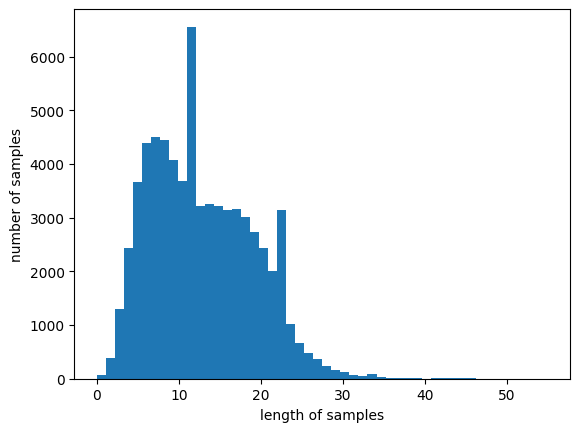

In [27]:
import matplotlib.pyplot as plt

print('최대 길이 :',max(len(review) for review in X_train))
print('평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [28]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [29]:
max_len = 50
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 50 이하인 샘플의 비율: 99.99560239815887


In [30]:
X_train = pad_sequences(X_train, maxlen=max_len)

In [31]:
len(X_train)

68219

In [32]:
len(y_train)

68219

In [33]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [34]:
y_train = y_train.astype(int)

In [35]:
pd.Series(y_train).value_counts()

1    14908
0    14831
3    14675
2    14456
4     9349
dtype: int64

In [36]:
num = np.unique(y_train, axis=0)
num = num.shape[0]
one_hot_y_train = np.eye(num)[y_train]
one_hot_y_train

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [37]:
embedding_dim = 150
hidden_units = 200

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(5, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, one_hot_y_train, epochs=50, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/50
853/853 [==============================] - ETA: 0s - loss: 1.1758 - acc: 0.5202
Epoch 1: val_acc improved from -inf to 0.33150, saving model to best_model.h5
853/853 [==============================] - 69s 79ms/step - loss: 1.1758 - acc: 0.5202 - val_loss: 1.4685 - val_acc: 0.3315
Epoch 2/50
853/853 [==============================] - ETA: 0s - loss: 0.9951 - acc: 0.6112
Epoch 2: val_acc did not improve from 0.33150
853/853 [==============================] - 64s 75ms/step - loss: 0.9951 - acc: 0.6112 - val_loss: 1.4741 - val_acc: 0.3269
Epoch 3/50
853/853 [==============================] - ETA: 0s - loss: 0.9201 - acc: 0.6446
Epoch 3: val_acc did not improve from 0.33150
853/853 [==============================] - 63s 74ms/step - loss: 0.9201 - acc: 0.6446 - val_loss: 1.5608 - val_acc: 0.3256
Epoch 4/50
853/853 [==============================] - ETA: 0s - loss: 0.8506 - acc: 0.6729
Epoch 4: val_acc did not improve from 0.33150
853/853 [==============================] - 71s 83ms

In [38]:
loaded_model = load_model('best_model.h5')

In [39]:
import re

def sentiment_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(np.argmax(loaded_model.predict(pad_new), axis=-1)) # 예측
  if score == 0:
    print('불안')
  elif score == 1:
    print('분노')
  elif score == 2:
    print('상처')
  elif score == 3:
    print('슬픔')
  elif score == 4:
    print('기쁨')
  # print(f'score = {score}')

In [40]:
test_val_df = pd.read_csv('C:/playdata/DL_miniproject/deeplearning_mini_pj/jiin/emo_/keyword_emotion_sentence_only_validation.csv')
test_val_df

,Unnamed: 0,상황키워드,감정_대분류,사람문장
0,0,"진로,취업,직장",불안,이번 프로젝트에서 발표를 하는데 내가 실수하는 바람에 우리 팀이 감점을 받았어. 너...
1,1,"진로,취업,직장",불안,회사에서 중요한 프로젝트를 혼자 하게 됐는데 솔직히 두렵고 무서워. 나에게 너무 크...
2,2,"진로,취업,직장",불안,상사가 너무 무섭게 생겨서 친해지는 게 너무 두려워. 무섭게 생겼는데도 업무를 보려...
3,3,"진로,취업,직장",불안,이번에 힘들게 들어간 첫 직장이거든. 첫 직장이라서 그런지 너무 긴장된다. 첫 직장...
4,4,"진로,취업,직장",불안,직장에서 동료들이랑 관계가 안 좋아질까 봐 걱정돼. 내가 낯가림이 심해서 친해질 수...
...,...,...,...,...
5588,6631,"연애,결혼,출산",기쁨,남자친구랑 헤어질 뻔했는데 다시 화해했어. 정말 다행이야. 내가 과음하고 실수를 해...
5589,6632,"연애,결혼,출산",상처,나 너무 억울하고 속상한 일이 있어. 피곤해서 남자친구 연락에 대답하지 못하고 잠들...
5590,6633,"연애,결혼,출산",상처,친구 결혼식에 갔었는데 내가 안 온 줄 알고 친구가 토라져서 억울해! 바쁜 사정이 ...
5591,6634,"연애,결혼,출산",상처,나는 결혼을 안 하는 건데 주변에서는 결혼을 못 하는 거로 생각해. 강하게 나서서 ...


In [41]:
test_val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5593 entries, 0 to 5592
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5593 non-null   int64 
 1   상황키워드       5593 non-null   object
 2   감정_대분류      5593 non-null   object
 3   사람문장        5593 non-null   object
dtypes: int64(1), object(3)
memory usage: 174.9+ KB


In [76]:
test_list = []
for sentence in tqdm(test_val_df['사람문장']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    test_list.append(stopwords_removed_sentence)

100%|██████████| 5593/5593 [00:24<00:00, 223.93it/s]


In [77]:
X_test = tokenizer.texts_to_sequences(test_list)
X_test = pad_sequences(X_test, maxlen=max_len)

In [78]:
y_pred = loaded_model.predict(X_test)

175/175 [==============================] - 3s 14ms/step


In [79]:
tmp = np.argmax(model.predict(X_test), axis=-1) # 예측

175/175 [==============================] - 3s 15ms/step


In [80]:
test_val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5593 entries, 0 to 5592
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5593 non-null   int64 
 1   상황키워드       5593 non-null   object
 2   감정_대분류      5593 non-null   object
 3   사람문장        5593 non-null   object
 4   추정_감정_대분류   5593 non-null   object
dtypes: int64(1), object(4)
memory usage: 218.6+ KB


In [81]:
test_val_df['추정_감정_대분류'] = pd.DataFrame(tmp)

In [82]:
test_val_df['추정_감정_대분류'].value_counts()

0    1331
1    1328
4    1135
2    1105
3     694
Name: 추정_감정_대분류, dtype: int64

In [83]:
def num_to_emo(number):
    if number == 0:
        return '불안'
    elif number == 1:
        return '분노'
    elif number == 2:
        return '상처'
    elif number == 3:
        return '슬픔'
    elif number == 4:
        return '기쁨'

In [84]:
test_val_df['추정_감정_대분류'] = test_val_df['추정_감정_대분류'].apply(num_to_emo)

In [85]:
correct_df = test_val_df[test_val_df['감정_대분류'] == test_val_df['추정_감정_대분류']]

In [86]:
len(correct_df) / len(test_val_df)

0.7010548900411229

In [87]:
test_val_df.to_csv('person12_3_stopword_txt.csv', index=False)